# **Import Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Loading the dataset

In [2]:
netflix = pd.read_csv('netflix.csv')

In [3]:
netflix.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


In [5]:
netflix.columns

Index(['show_id', 'type', 'title', 'director', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in'],
      dtype='object')

Further exploring the data using the following python functions

In [7]:
netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   country       8790 non-null   object
 5   date_added    8790 non-null   object
 6   release_year  8790 non-null   int64 
 7   rating        8790 non-null   object
 8   duration      8790 non-null   object
 9   listed_in     8790 non-null   object
dtypes: int64(1), object(9)
memory usage: 686.8+ KB


In [8]:
netflix.describe()

,release_year
count,8790.000000
mean,2014.183163
std,8.825466
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [10]:
netflix.shape

(8790, 10)

In [13]:
df_cat = [['show_id', 'type', 'title', 'director', 'country', 'date_added','rating', 'duration', 'listed_in']]
df_num = [['release_year']]

In [14]:
df_cat

[['show_id',
  'type',
  'title',
  'director',
  'country',
  'date_added',
  'rating',
  'duration',
  'listed_in']]

In [15]:
df_num

[['release_year']]

# Identfying null values per field

No null values 
NOTE: dropping fields need to be consider with factors 

In [16]:
netflix.isnull().sum()

show_id         0
type            0
title           0
director        0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
dtype: int64

<Axes: >

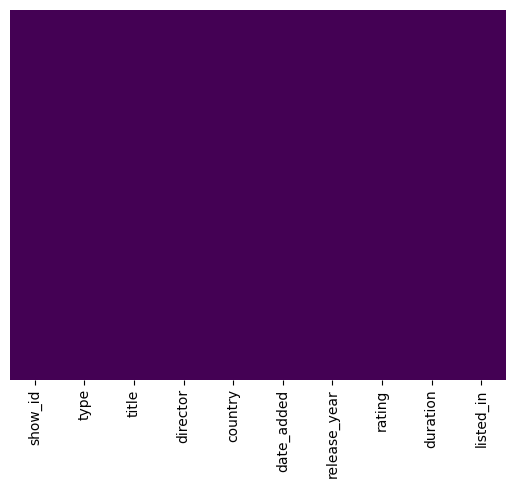

In [26]:
sns.heatmap(netflix.isnull(),yticklabels=False,cbar=False,cmap='viridis')

# **Determining the outliers**

<Axes: >

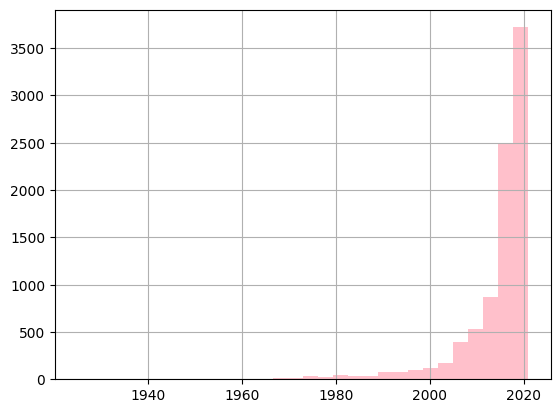

In [28]:
netflix['release_year'].hist(bins=30,color='pink')

In [27]:
netflix[netflix['release_year'] > 2020]

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
5,s9,TV Show,The Great British Baking Show,Andy Devonshire,United Kingdom,9/24/2021,2021,TV-14,9 Seasons,"British TV Shows, Reality TV"
6,s10,Movie,The Starling,Theodore Melfi,United States,9/24/2021,2021,PG-13,104 min,"Comedies, Dramas"
...,...,...,...,...,...,...,...,...,...,...
6920,s1461,TV Show,Monarca,Not Given,Mexico,1/1/2021,2021,TV-MA,2 Seasons,"International TV Shows, Spanish-Language TV Sh..."
6922,s1467,Movie,The Minimalists: Less Is Now,Not Given,United States,1/1/2021,2021,TV-14,54 min,Documentaries
6948,s1552,TV Show,Hilda,Not Given,United Kingdom,12/14/2020,2021,TV-Y7,2 Seasons,Kids' TV
6992,s1697,TV Show,Polly Pocket,Not Given,Canada,11/15/2020,2021,TV-Y,2 Seasons,Kids' TV


<Axes: >

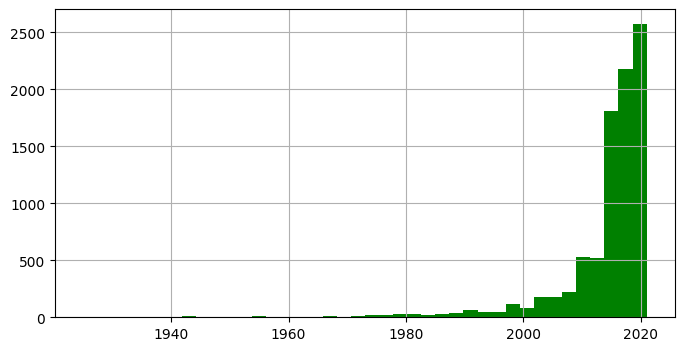

In [24]:
netflix['release_year'].hist(color='green',bins=40,figsize=(8,4))

<Axes: xlabel='type', ylabel='count'>

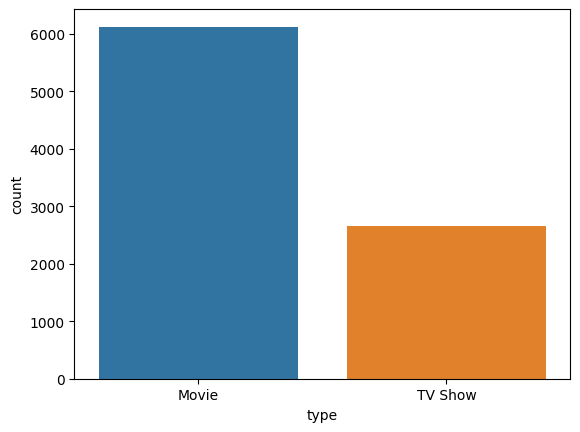

In [29]:
sns.countplot(x='type',data=netflix)

In [31]:
netflix['director'].to_list()[0:30]

['Kirsten Johnson',
 'Julien Leclercq',
 'Mike Flanagan',
 'Bruno Garotti',
 'Haile Gerima',
 'Andy Devonshire',
 'Theodore Melfi',
 'Suhas Kadav',
 'Christian Schwochow',
 'Suhas Kadav',
 'Suhas Kadav',
 'Suhas Kadav',
 'Not Given',
 'Krysia Plonka, Kristian Mercado',
 'Krysia Plonka, Kristian Mercado',
 'Krysia Plonka, Kristian Mercado',
 'Krysia Plonka, Kristian Mercado',
 'Not Given',
 'Not Given',
 'Mark Thornton, Todd Kauffman',
 'Mark Thornton, Todd Kauffman',
 'Mark Thornton, Todd Kauffman',
 'Mark Thornton, Todd Kauffman',
 'Robert Cullen, José Luis Ucha',
 'Kongkiat Komesiri',
 'Pedro de Echave García, Pablo Azorín Williams',
 'Anirban Majumder',
 'Olivier Megaton',
 'Alex Woo, Stanley Moore',
 'S. Shankar']

In [44]:
grouped_by_type = netflix.groupby(['type', 'director', 'rating'])
grouped_by_type.size()

type     director                              rating
Movie    A. L. Vijay                           TV-14     2
         A. Raajdheep                          TV-14     1
         A. Salaam                             TV-14     1
         A.R. Murugadoss                       TV-14     1
                                               TV-MA     1
                                                        ..
TV Show  Vijay S. Bhanushali                   TV-Y7     1
         Vikramaditya Motwane, Anurag Kashyap  TV-MA     1
         Wouter Bouvijn                        TV-MA     1
         Yasuhiro Irie                         TV-14     1
         Ziad Doueiri                          TV-MA     1
Length: 5207, dtype: int64

Note: Graphs could be made using seaborn and matplotlib depends on what is needed.
